Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Train Image Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_dir = '/content/drive/MyDrive/projek_mesin/plantvillage_dataset/train'

train_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2536 files belonging to 4 classes.


Validation Image Preprocessing

In [3]:
val_dir = '/content/drive/MyDrive/projek_mesin/plantvillage_dataset/val'

val_set = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 635 files belonging to 4 classes.


Building Model and Convolution Layer

In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

Compiling and Training Phase

In [15]:
cnn.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         6,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,791,728 (29.72 MB)

 Trainable params: 7,791,728 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = cnn.fit(x=train_set,validation_data=val_set,epochs=20)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 38s 238ms/step - accuracy: 0.4734 - loss: 2.8057 - val_accuracy: 0.7008 - val_loss: 0.8633
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.7176 - loss: 0.7568 - val_accuracy: 0.7276 - val_loss: 0.6652
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.7627 - loss: 0.6795 - val_accuracy: 0.7559 - val_loss: 0.6207
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - accuracy: 0.8165 - loss: 0.5265 - val_accuracy: 0.8709 - val_loss: 0.3845
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - accuracy: 0.8417 - loss: 0.4400 - val_accuracy: 0.7386 - val_loss: 0.6326
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.7674 - loss: 0.6014 - val_accuracy: 0.8756 - val_loss: 0.4191
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - accuracy: 0.8513 - loss: 0.4268 - val_accuracy: 0.9008 - val_loss: 0.3007
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.8940 - loss: 0.3065 - val_accura

Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(train_set)
print('Training accuracy:', train_acc)

80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.9775 - loss: 0.0633
Training accuracy: 0.9814668893814087


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(val_set)
print('Validation accuracy:', val_acc)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9499 - loss: 0.1480
Validation accuracy: 0.9417322874069214


Saving Model

In [38]:
from google.colab import drive
drive.mount('/content/drive')

cnn.save('/content/drive/MyDrive/projek_mesin/trained_plant_disease_model.keras')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5705835819244385,
  0.7283123135566711,
  0.784305989742279,
  0.8375394344329834,
  0.8544952869415283,
  0.8328076004981995,
  0.8671135902404785,
  0.8919558525085449,
  0.89826500415802,
  0.9171923995018005,
  0.8848580718040466,
  0.9171923995018005,
  0.9286277890205383,
  0.9455835819244385,
  0.8935331106185913,
  0.9294164180755615,
  0.9420347213745117,
  0.9313880205154419,
  0.9392744302749634,
  0.9495267868041992],
 'loss': [1.4708912372589111,
  0.7260916233062744,
  0.638677716255188,
  0.46795183420181274,
  0.425323486328125,
  0.45848265290260315,
  0.37523242831230164,
  0.3092583417892456,
  0.29651784896850586,
  0.23557235300540924,
  0.30048689246177673,
  0.23446808755397797,
  0.18956153094768524,
  0.14582960307598114,
  0.3212580978870392,
  0.20571425557136536,
  0.15634791553020477,
  0.2015051543712616,
  0.17790402472019196,
  0.14716459810733795],
 'val_accuracy': [0.7007874250411987,
  0.7275590300559998,
  0.7559055089950562,
  0.8708

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Accuracy Visualization

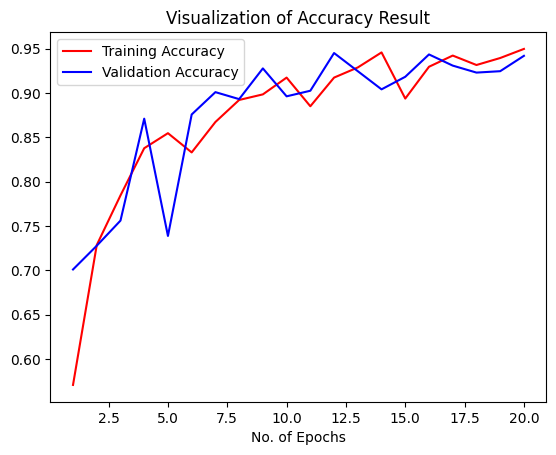

In [26]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

Some other metrics for Model Evaluation

In [27]:
class_name = val_set.class_names

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 635 files belonging to 4 classes.


In [29]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

635/635 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


In [30]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [31]:
Y_true

<tf.Tensor: shape=(635,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [32]:
predicted_categories

<tf.Tensor: shape=(635,), dtype=int64, numpy=
array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 3, 1, 0, 0, 1, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [34]:
# Precision Recall F1-score
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                          precision    recall  f1-score   support

      Apple___Apple_scab       0.93      0.82      0.87       126
       Apple___Black_rot       0.96      0.98      0.97       125
Apple___Cedar_apple_rust       0.90      0.96      0.93        55
         Apple___healthy       0.95      0.97      0.96       329

                accuracy                           0.94       635
               macro avg       0.93      0.93      0.93       635
            weighted avg       0.94      0.94      0.94       635



Confusion Matrix Visualization

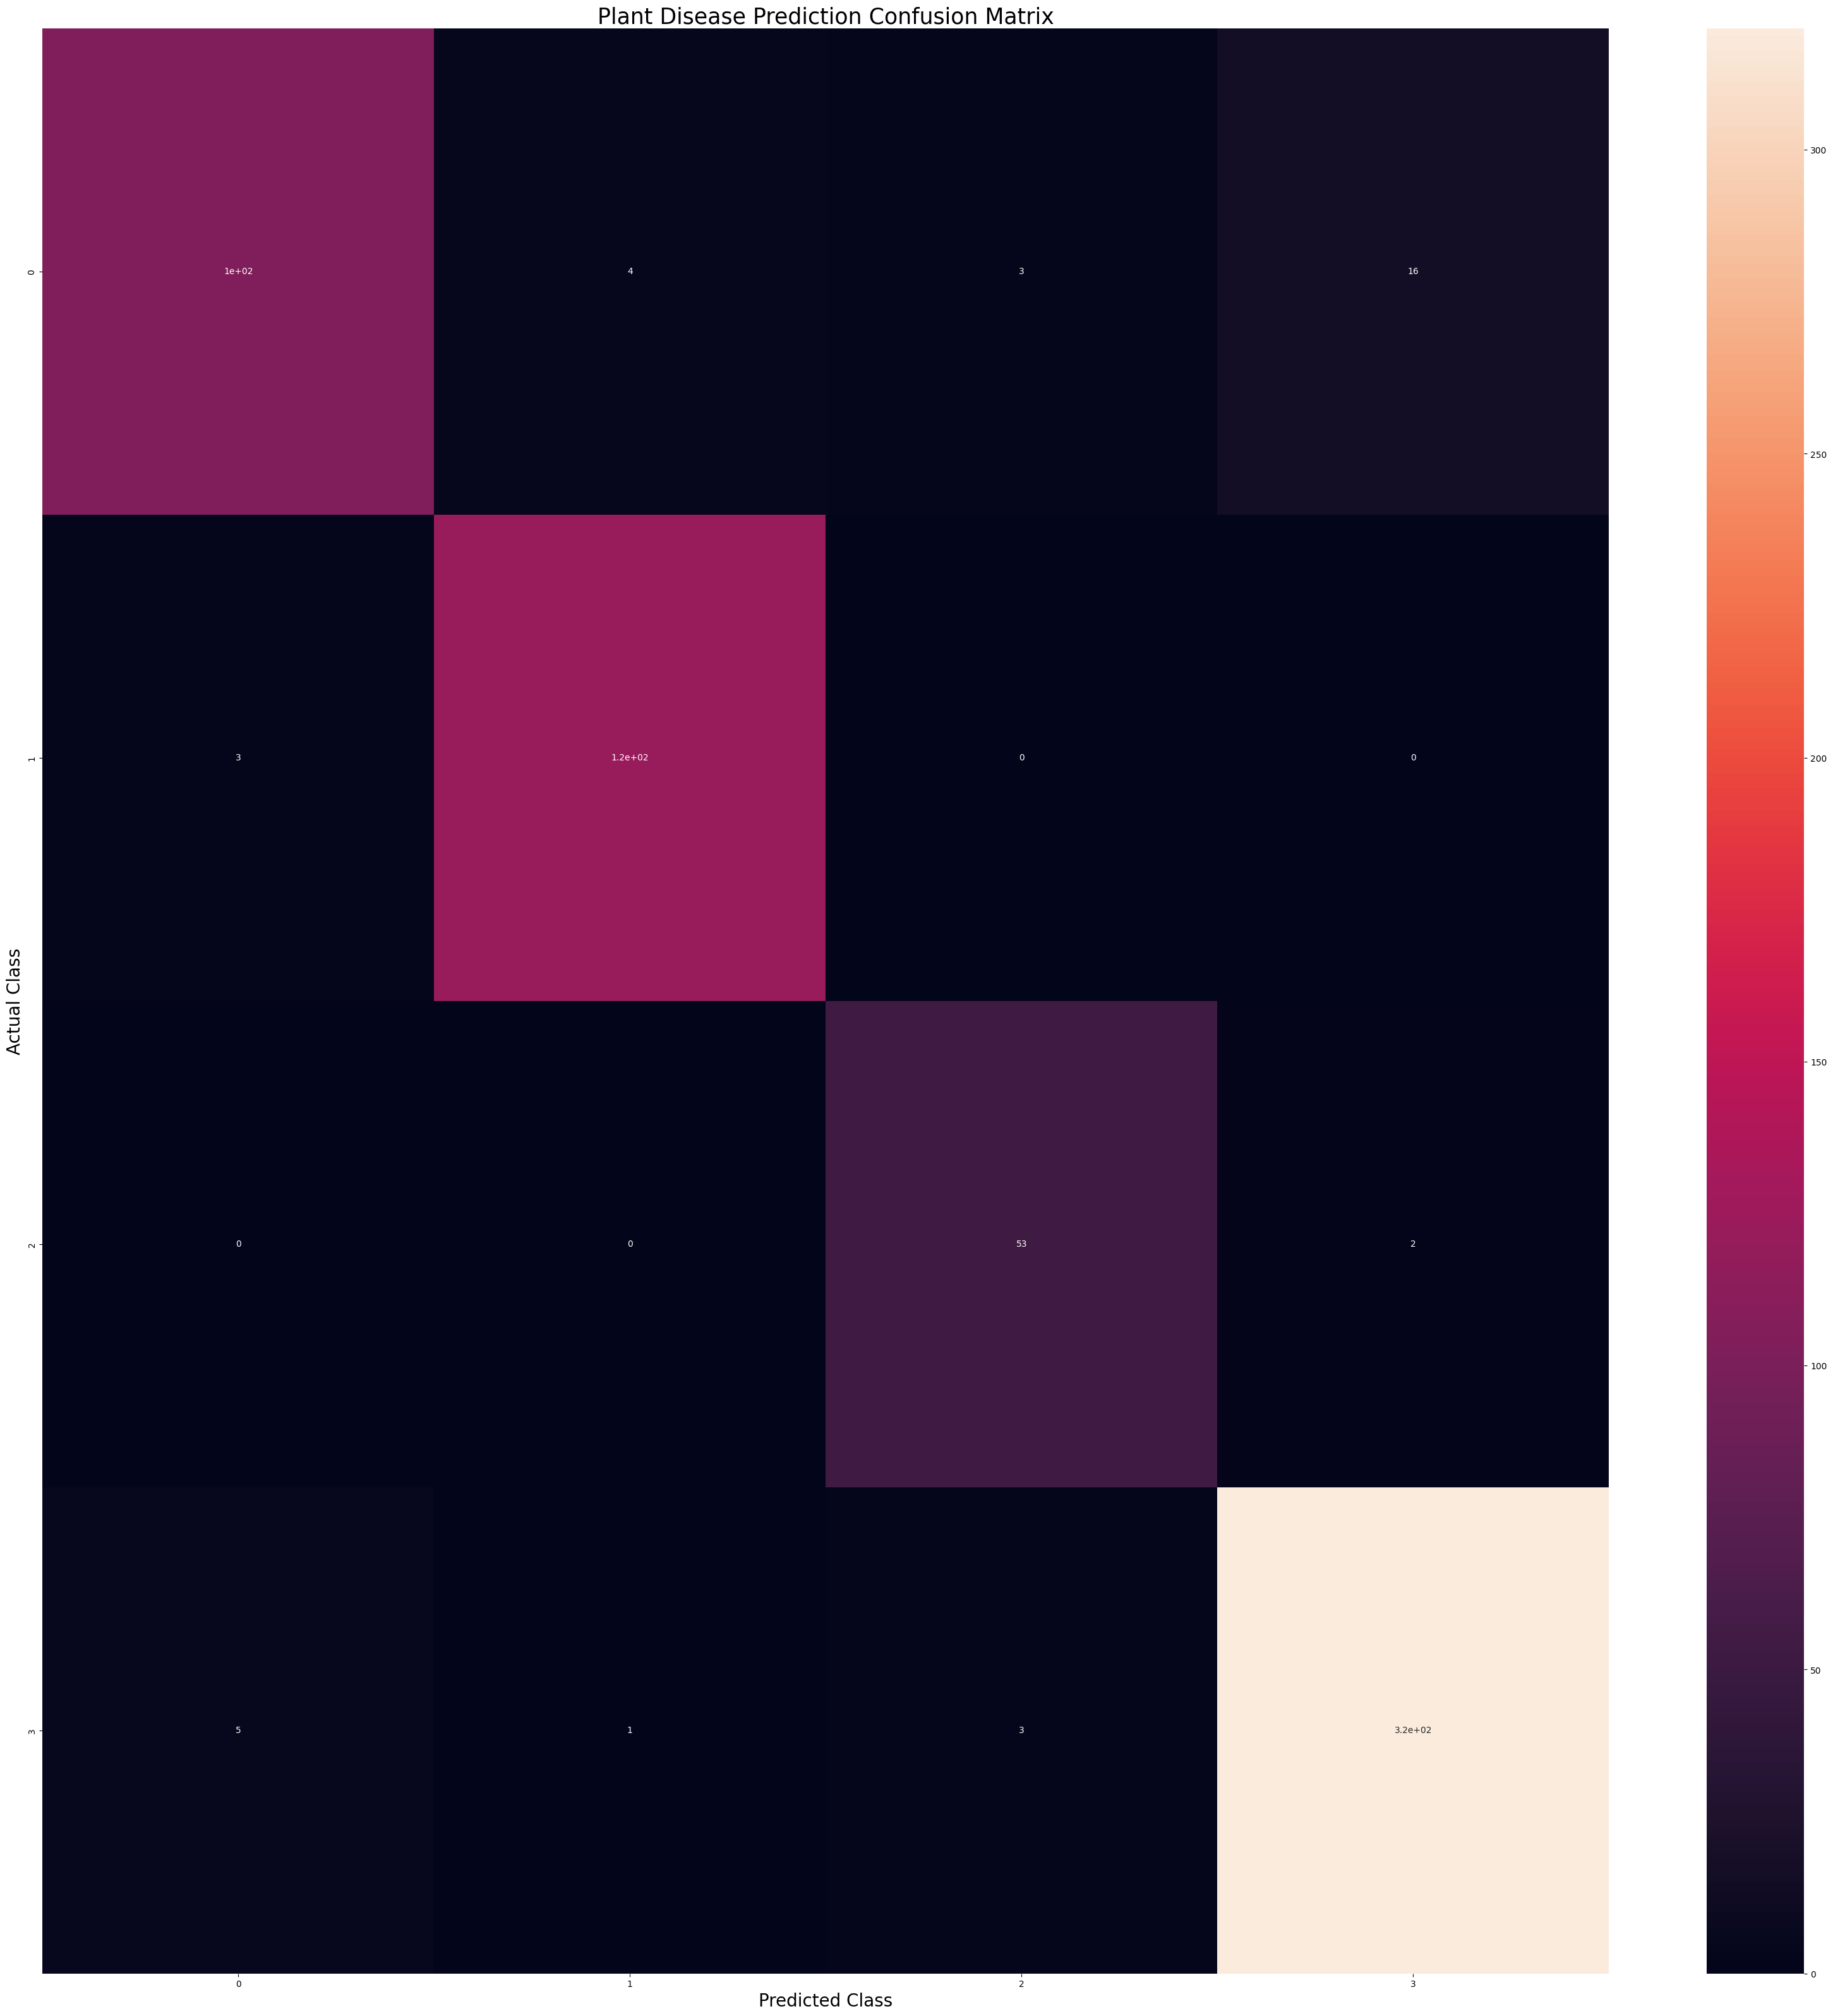

In [35]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()